## Final Project--- SCM 516

**Section I** 

**Classification dataset:**
* Gender Classification Dataset
* https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [29]:
# read file
df_old=pd.read_csv(r"/Users/luns/Desktop/ASU/SCM516/TA/gender_classification_v7.csv")

In [31]:
# remove space
df_old.columns = df_old.columns.str.strip()
print(df_old.columns)

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


In [33]:
# check imported data
df_old.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


**Remove Outlier**

In [35]:
import pandas as pd

# Remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1 
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

# Columns that are numeric
numeric_columns = df_old.select_dtypes(include=['float64', 'int64']).columns

# Apply outlier removal to create the cleaned DataFrame
df = remove_outliers_iqr(df_old, numeric_columns)

# Print the cleaned DataFrame
print("Cleaned DataFrame (df) without outliers:")
print(df)

Cleaned DataFrame (df) without outliers:
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
4             1               13.5                 5.9          0          0   
5             1               13.0                 6.8          1          1   
6             1               15.3                 6.2          1          1   
8             1               11.9                 5.4          1          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

**Balance the data**

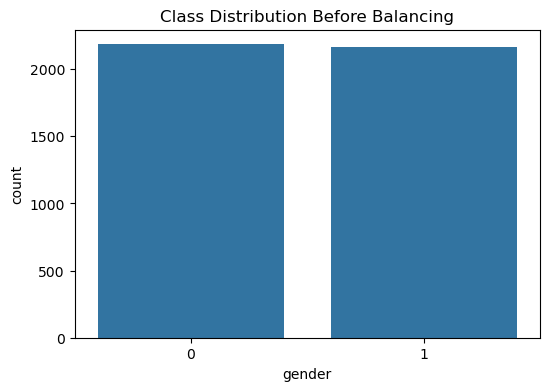

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step 1: Visualize the class distribution before balancing
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df_cleaned)
plt.title('Class Distribution Before Balancing')
plt.show()

* Data is alreay pretty balanced so no need to balanced the data again

In [41]:
print(df.columns)

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


In [130]:
# Calculate the median for 'forehead_width_cm' and 'forehead_height_cm'
forehead_width_median = df['forehead_width_cm'].median()
forehead_height_median = df['forehead_height_cm'].median()

# Create new columns 'forehead_width_category' and 'forehead_height_category' with 'Low' or 'High' values
df['forehead_width_category'] = ['Low' if val < forehead_width_median else 'High' for val in df['forehead_width_cm']]
df['forehead_height_category'] = ['Low' if val < forehead_height_median else 'High' for val in df['forehead_height_cm']]

In [128]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_width_category,forehead_height_category
0,1,11.8,6.1,1,0,1,1,Male,Low,High
4,1,13.5,5.9,0,0,0,0,Female,High,High
5,1,13.0,6.8,1,1,1,1,Male,Low,High
6,1,15.3,6.2,1,1,1,0,Male,High,High
8,1,11.9,5.4,1,0,1,1,Female,Low,Low


* Calculate the median for both forehead_width_cm and forehead_height_cm, and then classify the values as either "Low" or "High" based on whether they fall below or above the median.

### 1. Conditional Probability

**1-1 Single feature conditional probabilities:**

1. P(Gender = Male∣nose_wide = 1 )

In [65]:
male_nose_wide = df[(df['nose_wide'] == 1) & (df['gender'] == 'Male' )].shape[0]
nose_wide = df[(df['nose_wide'] == 1) ].shape[0]
probability = (male_nose_wide/ nose_wide)* 100
print(f"P(Gender = Male∣nose_wide = 1 ): {probability:.2f} %")

P(Gender = Male∣nose_wide = 1 ): 87.95 %


2. P(Gender = Male∣lips_thin = 1 )

In [68]:
male_lips_thin = df[(df['lips_thin'] == 1) & (df['gender'] == 'Male' )].shape[0]
lips_thin = df[(df['lips_thin'] == 1) ].shape[0]
probability = (male_lips_thin/ lips_thin)* 100
print(f"P(Gender = Male∣lips_thin = 1 ): {probability:.2f} %")

P(Gender = Male∣lips_thin = 1 ): 87.37 %


3. P(Gender = Male∣forehead_width_category = Low )

In [71]:
male_forehead_width_category = df[(df['forehead_width_category'] == 'Low') & (df['gender'] == 'Male' )].shape[0]
forehead_width_category = df[(df['forehead_width_category'] == 'Low') ].shape[0]
probability = (male_forehead_width_category/ forehead_width_category)* 100
print(f" P(Gender = Male∣forehead_width_category = Low )): {probability:.2f} %")

 P(Gender = Male∣forehead_width_category = Low )): 39.16 %


4. P(Gender = Female∣forehead_width_category = Low )

In [74]:
Female_forehead_width_category = df[(df['forehead_width_category'] == 'Low') & (df['gender'] == 'Female' )].shape[0]
forehead_width_category = df[(df['forehead_width_category'] == 'Low') ].shape[0]
probability = (Female_forehead_width_category/ forehead_width_category)* 100
print(f" P(Gender = Female∣forehead_width_category = Low ): {probability:.2f} %")

 P(Gender = Female∣forehead_width_category = Low ): 60.84 %


5.P(Gender = Male∣long_hair = 1 )

In [77]:
male_long_hair = df[(df['long_hair'] == 1) & (df['gender'] == 'Male' )].shape[0]
long_hair = df[(df['long_hair'] == 1) ].shape[0]
probability = (male_long_hair/ long_hair)* 100
print(f"P(Gender = Male∣long_hair = 1 ): {probability:.2f} %")

P(Gender = Male∣long_hair = 1 ): 49.78 %


5.P(Gender = Female∣long_hair = 1 )

In [80]:
Female_long_hair = df[(df['long_hair'] == 1) & (df['gender'] == 'Female' )].shape[0]
long_hair = df[(df['long_hair'] == 1) ].shape[0]
probability = (male_long_hair/ long_hair)* 100
print(f"P(Gender = Female∣long_hair = 1 ): {probability:.2f} %")

P(Gender = Female∣long_hair = 1 ): 49.78 %


6. P(Gender = Female∣forehead_width_category = High )

In [83]:
Female_forehead_width_category = df[(df['forehead_width_category'] == 'High') & (df['gender'] == 'Female' )].shape[0]
forehead_width_category = df[(df['forehead_width_category'] == 'High') ].shape[0]
probability = (Female_forehead_width_category/ forehead_width_category)* 100
print(f" P(Gender = Female∣forehead_width_category = Low )): {probability:.2f} %")

 P(Gender = Female∣forehead_width_category = Low )): 40.52 %


7. P(Gender = Female ∣ lips_thin = 1 )

In [86]:
Female_lips_thin = df[(df['lips_thin'] == 1) & (df['gender'] == 'Female' )].shape[0]
lips_thin = df[(df['lips_thin'] == 1) ].shape[0]
probability = (Female_lips_thin/ lips_thin)* 100
print(f"P(Gender = Female∣lips_thin = 1 ): {probability:.2f} %")

P(Gender = Female∣lips_thin = 1 ): 12.63 %


**1-2 Multiple feature conditional probabilities:**

1.P(Gender = Female ∣ nose_wide = 1,lips_thin = 1 )

In [90]:
nose_wide = df['nose_wide'] == 1
lips_thin = df['lips_thin'] == 1
female = df['gender'] == 'Female' 

female_nose_wide_lips_thin = df[female & nose_wide & lips_thin]

total_female_nose_wide_lips_thin = female_nose_wide_lips_thin.shape[0]

total_nose_wide_lips_thin = df[nose_wide & lips_thin].shape[0]

probability = (total_female_nose_wide_lips_thin / total_nose_wide_lips_thin) * 100
print(f"P(Gender = Female | nose_wide = 1, lips_thin = 1): {probability:.2f} %")

P(Gender = Female | nose_wide = 1, lips_thin = 1): 1.74 %


2. P(Gender = Male∣nose_wide = 1,forehead_width_category = low)

In [93]:
nose_wide = df['nose_wide'] == 1
forehead_width_low = df['forehead_width_category'] == 'Low'
male = df['gender'] == 'Male'

male_nose_wide_forehead_low = df[male & nose_wide & forehead_width_low]
total_male_nose_wide_forehead_low = male_nose_wide_forehead_low.shape[0]
total_nose_wide_forehead_low = df[nose_wide & forehead_width_low].shape[0]

probability = (total_male_nose_wide_forehead_low / total_nose_wide_forehead_low) * 100
print(f"P(Gender = Male | nose_wide = 1, forehead_width_category = low): {probability:.2f} %")


P(Gender = Male | nose_wide = 1, forehead_width_category = low): 83.39 %


3. P(Gender = Female∣nose_wide = 1,nose_long = 0)

In [96]:
nose_wide = df['nose_wide'] == 1
nose_long = df['nose_long'] == 0
female = df['gender'] == 'Female'

female_nose_wide_nose_short = df[female & nose_wide & nose_long]
total_female_nose_wide_nose_short = female_nose_wide_nose_short.shape[0]
total_nose_wide_nose_short = df[nose_wide & nose_long].shape[0]

probability = (total_female_nose_wide_nose_short / total_nose_wide_nose_short) * 100
print(f"P(Gender = Female | nose_wide = 1, nose_long = 0): {probability:.2f} %")

P(Gender = Female | nose_wide = 1, nose_long = 0): 52.49 %


4. P(Gender = Male∣forehead_width_cm = High,nose_long = 0)

In [99]:
forehead_width_high = df['forehead_width_category'] == 'High'
nose_short = df['nose_long'] == 0
male = df['gender'] == 'Male'

male_forehead_wide_nose_short = df[male & forehead_width_high & nose_short]
total_male_forehead_wide_nose_short = male_forehead_wide_nose_short.shape[0]
total_forehead_wide_nose_short = df[forehead_width_high & nose_short].shape[0]

probability = (total_male_forehead_wide_nose_short / total_forehead_wide_nose_short) * 100
print(f"P(Gender = Male | forehead_width_category = High, nose_long = 0): {probability:.2f} %")

P(Gender = Male | forehead_width_category = High, nose_long = 0): 16.14 %


5. P(Gender = Male ∣ forehead_width_category = High,forehead_height_category = Low)

In [102]:
forehead_width_category_high = df['forehead_width_category'] == 'High'
forehead_height_category_low = df['forehead_height_category'] == 'Low'
male = df['gender'] == 'Male'

male_forehead_wide_height_low = df[male & forehead_width_category_high & forehead_height_category_low]
total_male_forehead_wide_height_low = male_forehead_wide_height_low.shape[0]
total_forehead_wide_height_low = df[forehead_width_category_high & forehead_height_category_low].shape[0]

probability = (total_male_forehead_wide_height_low / total_forehead_wide_height_low) * 100
print(f"P(Gender = Male | forehead_width_category = High, forehead_height_category = Low): {probability:.2f} %")

P(Gender = Male | forehead_width_category = High, forehead_height_category = Low): 52.22 %


### 2. Feature/factor Importance


**- Feature importance using Naïve Bayes**

**Male**

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming the cleaned dataset is df and it contains the necessary features
X = df[['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 
        'forehead_width_category', 'forehead_height_category']]
y = df['gender']  # Assuming 'Gender' is in the form of Male or Female

# Encode categorical features if necessary (e.g., Gender, forehead levels)
X = pd.get_dummies(X, drop_first=True)
y = y.map({'Male': 0, 'Female': 1})  # Map Male = 0, Female = 1 for consistency

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# List of categorical features we want to analyze
categorical_features = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 
                        'forehead_width_category', 'forehead_height_category']

# Function to calculate probabilities for categorical features
def calculate_conditional_probabilities(feature, target):
    feature_values = df[feature].unique()  # Get unique values of the feature (e.g., Low, High for forehead categories)
    
    for value in feature_values:
        subset_data = df[df[feature] == value]
        if subset_data.shape[0] > 0:
            p_male = subset_data[target].value_counts(normalize=True).get(0, 0)  # P(Gender = Male) where Male is 0
            print(f"P(Gender = Male | {feature} = {value}): {p_male:.2f}")
        else:
            print(f"No data for {feature} = {value}")
    
    # Calculate the absolute difference in probabilities between feature values if there are exactly two values
    if len(feature_values) == 2:
        prob_1 = df[df[feature] == feature_values[0]]['gender'].value_counts(normalize=True).get(0, 0)
        prob_2 = df[df[feature] == feature_values[1]]['gender'].value_counts(normalize=True).get(0, 0)
        diff_in_probabilities = abs(prob_1 - prob_2)  # Use absolute value to avoid negative differences
        print(f"Absolute difference in probabilities for {feature}: {diff_in_probabilities:.2f}\n")

# Calculate the conditional probabilities for each feature in the dataset
for feature in categorical_features:
    print(f"\nCalculating for {feature}:")
    calculate_conditional_probabilities(feature, 'gender')


Calculating for long_hair:
P(Gender = Male | long_hair = 1): 0.50

Calculating for nose_wide:
P(Gender = Male | nose_wide = 1): 0.88
P(Gender = Male | nose_wide = 0): 0.88
Absolute difference in probabilities for nose_wide: 0.00


Calculating for nose_long:
P(Gender = Male | nose_long = 0): 0.88
P(Gender = Male | nose_long = 1): 0.86
Absolute difference in probabilities for nose_long: 0.02


Calculating for lips_thin:
P(Gender = Male | lips_thin = 1): 0.87
P(Gender = Male | lips_thin = 0): 0.87
Absolute difference in probabilities for lips_thin: 0.00


Calculating for distance_nose_to_lip_long:
P(Gender = Male | distance_nose_to_lip_long = 1): 0.88
P(Gender = Male | distance_nose_to_lip_long = 0): 0.88
Absolute difference in probabilities for distance_nose_to_lip_long: 0.00


Calculating for forehead_width_category:
P(Gender = Male | forehead_width_category = Low): 0.61
P(Gender = Male | forehead_width_category = High): 0.59
Absolute difference in probabilities for forehead_width_cate

/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/3730203437.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_male = subset_data[target].value_counts(normalize=True).get(0, 0)  # P(Gender = Male) where Male is 0
/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/3730203437.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_male = subset_data[target].value_counts(normalize=True).get(0, 0)  # P(Gender = Male) where Male is 0
/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/3730203437.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated.

**Female**

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming the cleaned dataset is df and it contains the necessary features
X = df[['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 
        'forehead_width_category', 'forehead_height_category']]
y = df['gender']  # Assuming 'Gender' is in the form of Male or Female

# Encode categorical features if necessary (e.g., Gender, forehead levels)
X = pd.get_dummies(X, drop_first=True)
y = y.map({'Male': 0, 'Female': 1})  # Map Male = 0, Female = 1 for consistency

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# List of categorical features we want to analyze
categorical_features = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 
                        'forehead_width_category', 'forehead_height_category']

# Function to calculate probabilities for categorical features
def calculate_conditional_probabilities(feature, target):
    binary_values = [0, 1]  # Handle binary features like long_hair, nose_wide explicitly
    if feature in ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']:
        feature_values = binary_values
    else:
        feature_values = df[feature].unique()  # For categorical features like Low, High
    
    for value in feature_values:
        subset_data = df[df[feature] == value]
        if subset_data.shape[0] > 0:
            p_female = subset_data[target].value_counts(normalize=True).get(1, 0)  # P(Gender = Female) where Female is 1
            print(f"P(Gender = Female | {feature} = {value}): {p_female:.2f}")
        else:
            print(f"No data for {feature} = {value}")
    
    # Calculate the absolute difference in probabilities between feature values if there are exactly two values
    if len(feature_values) == 2:
        prob_1 = df[df[feature] == feature_values[0]]['gender'].value_counts(normalize=True).get(1, 0)
        prob_2 = df[df[feature] == feature_values[1]]['gender'].value_counts(normalize=True).get(1, 0)
        diff_in_probabilities = abs(prob_1 - prob_2)  # Use absolute value to avoid negative differences
        print(f"Absolute difference in probabilities for {feature}: {diff_in_probabilities:.2f}\n")

# Calculate the conditional probabilities for each feature in the dataset
for feature in categorical_features:
    print(f"\nCalculating for {feature}:")
    calculate_conditional_probabilities(feature, 'gender')


Calculating for long_hair:
No data for long_hair = 0
P(Gender = Female | long_hair = 1): 0.50
Absolute difference in probabilities for long_hair: 0.50


Calculating for nose_wide:
P(Gender = Female | nose_wide = 0): 0.12
P(Gender = Female | nose_wide = 1): 0.12
Absolute difference in probabilities for nose_wide: 0.00


Calculating for nose_long:
P(Gender = Female | nose_long = 0): 0.12
P(Gender = Female | nose_long = 1): 0.14
Absolute difference in probabilities for nose_long: 0.02


Calculating for lips_thin:
P(Gender = Female | lips_thin = 0): 0.13
P(Gender = Female | lips_thin = 1): 0.13
Absolute difference in probabilities for lips_thin: 0.00


Calculating for distance_nose_to_lip_long:
P(Gender = Female | distance_nose_to_lip_long = 0): 0.12
P(Gender = Female | distance_nose_to_lip_long = 1): 0.12
Absolute difference in probabilities for distance_nose_to_lip_long: 0.00


Calculating for forehead_width_category:
P(Gender = Female | forehead_width_category = Low): 0.39
P(Gender = F

/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/139926033.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_female = subset_data[target].value_counts(normalize=True).get(1, 0)  # P(Gender = Female) where Female is 1
/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/139926033.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob_1 = df[df[feature] == feature_values[0]]['gender'].value_counts(normalize=True).get(1, 0)
/var/folders/6h/n6scws5970gc9qc_r059ht880000gn/T/ipykernel_35919/139926033.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a 

**- Feature importance using Random Forest**

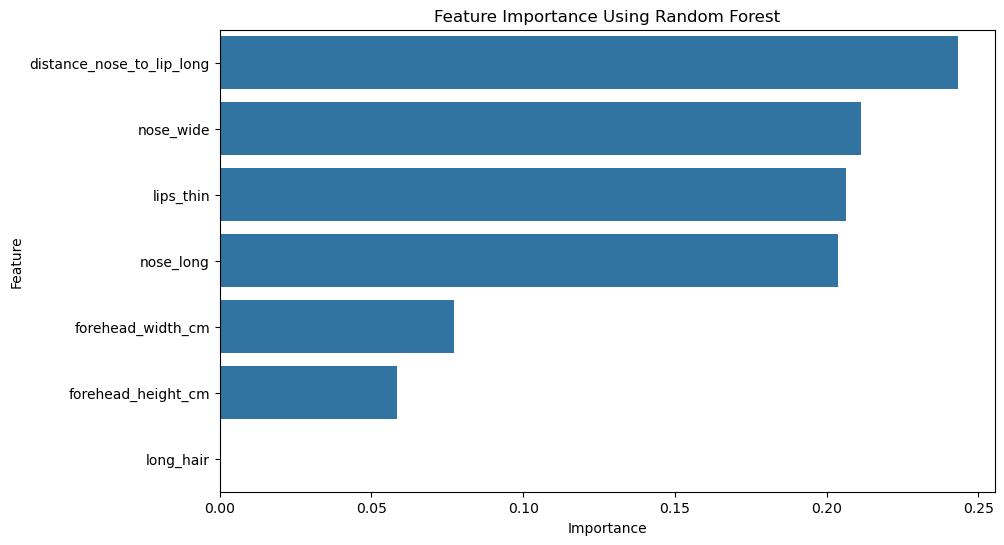

In [154]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the feature set (X) and the target variable (y)
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 
        'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]

y = df['gender']  # Target variable

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X, y)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Using Random Forest')
plt.show()

### 3. Machine Learning algorithms 

**Confusion matrix for Naïve Bayes, Decision Tree, Random Forest, and KNN**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define features (X) and target (y)
X = df.drop(columns=['gender'])  # Features
y = df['g']  # Target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "KNN")


**ROC Curve for Training Data:**

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve for training data
disp = RocCurveDisplay.from_estimator(nb_model, X_train, y_train)
RocCurveDisplay.from_estimator(dt_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_train, y_train, ax=disp.ax_)

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.title("ROC Curve for Training Dataset")
plt.show()

**ROC Curve for Testing Data:**

In [ ]:
# Plot ROC curve for testing data
disp = RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_model, X_test, y_test, ax=disp.ax_)

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.title("ROC Curve for Testing Dataset")
plt.show()

**Optimal K Value for KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

# List to store the error rates
error = []

# Loop through values of K from 1 to 20
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # Calculate accuracy and append the error rate (1 - accuracy)
    accuracy = balanced_accuracy_score(y_test, pred_i)
    error.append(1 - accuracy)

# Plot the error rates for different K values
plt.figure(figsize=(12,6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Finding Optimal K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))  # Set the ticks on the X-axis
plt.show()

**Optimal K Value for KNN**

* In the plot above, the error rate decreases significantly up to K=5, where it stabilizes and shows relatively low error. Therefore, K=5 is likely the optimal K value for this model, as it minimizes the error while maintaining model performance.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Lists to store accuracy for different K values
train_accuracies = []
test_accuracies = []

# Loop through K values from 1 to 10
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions for train and test sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate and store accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Output the accuracies for each K value with formatting for readability
for k in range(1, 11):
    print(f'K = {k}: Train Accuracy = {train_accuracies[k-1]:.2f}, Test Accuracy = {test_accuracies[k-1]:.2f}')

**Which algorithm performed the best, and why?**

* The Naive Bayes and Random Forest models performed the best, with similar accuracy (0.97) and almost identical precision, recall, and F1-scores. The Random Forest edges out slightly due to its marginally higher precision (0.98 for Female), making it the best-performing model overall in this case.


**Conclusion:**
* No Overfitting: There are no strong signs of overfitting in the Random Forest model's results based on the metrics provided. 

In [156]:
new_observations_2 = pd.DataFrame({
    'long_hair': [0, 1, 0, 1],
    'forehead_width_cm': [16, 17, 12, 18],
    'forehead_height_cm': [7, 8, 6, 10],
    'nose_wide': [1, 0, 1, 1],
    'nose_long': [1, 1, 1, 0],
    'lips_thin': [0, 1, 0, 1],
    'distance_nose_to_lip_long': [0, 1, 1, 0]
})

# Make predictions on this new dataset using the trained model
predictions_2 = rf_model.predict(new_observations_2)

# Convert numerical predictions back to their original labels (0: Female, 1: Male)
predicted_genders_2 = ['Female' if pred == 0 else 'Male' for pred in predictions_2]

ordinals = ['first', 'second', 'third', 'fourth']

for i, gender in enumerate(predicted_genders_2):
    print(f"The {ordinals[i]} observation is predicted to be {gender}.")

The first observation is predicted to be Male.
The second observation is predicted to be Male.
The third observation is predicted to be Male.
The fourth observation is predicted to be Male.


* The first observation is predicted to be Male.

* The second observation is predicted to be Male.

* The third observation is predicted to be Male.

* The fourth observation is predicted to be Male.